In [35]:
!pip install geopandas matplotlib shapely cdsapi

  Preparing metadata (setup.py) ... done
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12008 sha256=ea99fdfa12d16e2ae0d07ef44ed0b8647e24bc5f8e91e5f69659bed9e69a654d
  Stored in directory: /Users/mnky9800n/Library/Caches/pip/wheels/f9/26/57/a49a681496dea59363312ae87ffa8397100f8e8f6bab3591ea
Successfully built cdsapi


In [36]:
import geopandas as gpd
import ast
import shapely

In [37]:
df = gpd.read_file('data/diff_hb_2010.csv')
# df.set_geometry('.geo', inplace=True)
df.columns = ['system:index',
 'COAST',
 'DIST_MAIN',
 'DIST_SINK',
 'ENDO',
 'HYBAS_ID',
 'MAIN_BAS',
 'NEXT_DOWN',
 'NEXT_SINK',
 'ORDER',
 'PFAF_ID',
 'SORT',
 'SUB_AREA',
 'UP_AREA',
 'water_balance',
 '.geo',
 'geometry']
df['SUB_AREA'] = df.SUB_AREA.apply(float)

def convert_gee_geo(row):
    le = ast.literal_eval(row['.geo'])
    return shapely.Polygon(le['coordinates'][0])

df['.geo'] = df.apply(convert_gee_geo, axis=1)
df.set_geometry('.geo', inplace=True)

In [38]:
df.head()

,system:index,COAST,DIST_MAIN,DIST_SINK,ENDO,HYBAS_ID,MAIN_BAS,NEXT_DOWN,NEXT_SINK,ORDER,PFAF_ID,SORT,SUB_AREA,UP_AREA,water_balance,.geo,geometry
0,000000000000000017e6,0,2331.1,2331.1,0,4060788280,4060025450,4060786650,4060025450,1,452973,1270,3752.1,109042.1,-4.3645418887584754E-4,"POLYGON ((89.08298 29.29755, 89.08368 29.29341...",None
1,000000000000000017e7,0,2413.2,2413.2,0,4060787190,4060025450,4060788280,4060025450,1,452975,1276,415.0,97861.7,-0.0034816855108332043,"POLYGON ((88.87860 29.47575, 88.87973 29.46446...",None
2,000000000000000017e8,0,2439.8,2439.8,0,4060787530,4060025450,4060787190,4060025450,1,452977,1278,3658.4,83214.7,-6.444749856863318E-4,"POLYGON ((88.24583 29.74583, 88.24619 29.73921...",None
3,000000000000000017e9,0,2497.1,2497.1,0,4060787180,4060025450,4060787530,4060025450,1,452979,1283,2983.2,74088.8,6.538828913250759E-5,"POLYGON ((87.86667 29.57083, 87.86723 29.55612...",None
4,000000000000000017ea,0,2554.1,2554.1,0,4060785160,4060025450,4060787180,4060025450,1,452991,1286,12286.5,51219.8,3.570443481052973E-4,"POLYGON ((85.17464 29.25171, 85.17535 29.24757...",None


In [39]:
df['water_balance'] = df.water_balance.astype(float) * df.SUB_AREA # 30m by 30m pixels / 

<Axes: >

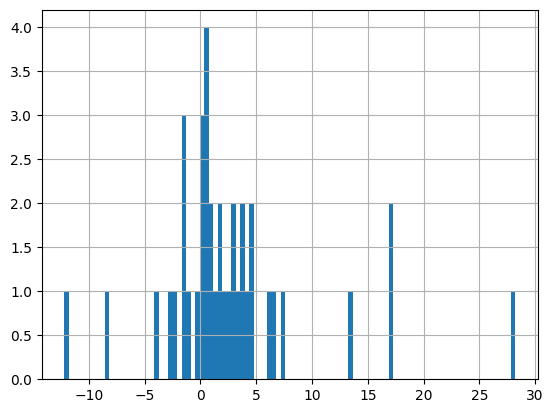

In [40]:
df.water_balance.hist(bins=100)

<Axes: >

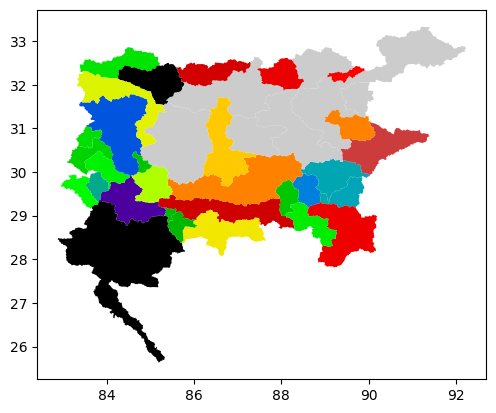

In [42]:
df.plot('water_balance', cmap='nipy_spectral', vmin=-5, vmax=5)


In [43]:
downloaded = False

if downloaded == False:

    import cdsapi

    c = cdsapi.Client()

    years = np.arange(2010, 2012, 1)
    days = [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ]
    months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    times = '23:00'
    area = [45, 68, 24, 107]

    for year in years:
        year = str(year)
        c.retrieve('reanalysis-era5-land', {'year':year, 'month':months, 'time':times, 'day':days, 'area':area
                                           ,'variable':'total_precipitation', 'format':'netcdf.zip'}
                  ,'precip-'+year+'netcdf.zip')

# now we need to unzip the data
if downloaded == False:
    import glob
    import shutil
    for f in glob.glob('data/precip/*'):
        unzipped_filename = f.split('-')[1][0:4]
        shutil.unpack_archive(f, unzipped_filename)

Exception: Missing/incomplete configuration file: /Users/mnky9800n/.cdsapirc